<a href="https://colab.research.google.com/github/Samrudhig/DS-Colab-Stuff/blob/main/Samrudhi_Gari__11687267__Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC5502 Midterm

As a data scientist at a top secret lab, you've been asked to clean and explore a dataset containing variables you've never seen before and have no knowledge of as the variables have been anonymized. Write a brief overview of how you plan to approach this project.

Enter your student id, in the next cell, when asked and then run the cell. Do not edit the cell and be careful about running the cell as it will rewrite your dataset.


MidTerm Activity
Majors: DataScience
SamrudhiGari
Student ID:11687267
### Overview
Firstly, the dataset is random so it signifies the dataset is uncleaned, may have  many nulls and need collecting and cleaning .Beginning with creating a dataframe to this random dataset using info , head and shape functions.which gives top 5 variables.and then finding nulls following with finding the constants and then dropping the constants which depicts the process of cleaning.Then finding the q constants or quasi which has 98% constants but not completely and then dropping these constants. moving on further with analyzing and dropping duplicate rows. Now plotting the histogram,to use median to replace missing data for good skewness and use interpolation to replace missing data for features that look normal and find the missing data by filtering.and then cleanin the features having same values using multicolinearity and depicting the relation with heatmaps.creating a seaborn and identifying the loowest p values from the linear regression results .

### Generate Seed and Data

In [ ]:
# create seed, run this cell as is, only edit your stud_id
import pandas as pd
import numpy as np
import pandas as pd
import string
import random
import re
from sklearn.datasets import make_regression


def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 100-w])
    return re.sub(r"[\[\]]",'', str(rtn))


# provide your student id as stud_id, replace 123456789 (automatice 0 if not replaced with your student id)
stud_id = 11687267
my_seed = random.seed(stud_id)

# Do not edit this cell beyond this line
variables = [''.join(random.choices(string.ascii_lowercase, k=3)) for _ in range(20)]
print(variables)

X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
random.shuffle(variables)
cols = variables[:10]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[10]] = 0.03
df[variables[11]] = 0.07
df[variables[12]] = df[variables[0]]
df[variables[13]] = df[cols[1]]
df[variables[10]] = df[variables[10]].apply(make_null, args=(2,))
df[variables[13]] = df[variables[13]].apply(make_null, args=(5,))
df[variables[14]] = random.sample(range(100, 1000), k=100)
df[variables[15]] = random.sample(range(1000, 10000), k=100)

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(7,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(8,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(9,))

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

cats = [random.choice(['x', 'o']) for i in range(100)]
df['survival'] = cats
cats = [random.choice(['yes', 'no']) for i in range(100)]
df['treatment'] = cats
cats = [random.choice(['level 1', 'level 2', 'level 3']) for i in range(100)]
df['level'] = cats
cats = [random.choice(['stage 5', 'stage 4', 'stage 3', 'stage 2', 'stage 1']) for i in range(100)]
df['stage'] = cats

df['target'] = y

dupes = df.loc[0:5]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

#df.to_csv('midterm.csv', index=False) # comment this out after successful run so that you don't overwrite your data

['ljr', 'pvm', 'ckw', 'lie', 'hrq', 'ghv', 'gkb', 'fze', 'lev', 'mmv', 'tfa', 'mvq', 'jyc', 'coa', 'ugs', 'zif', 'ial', 'qxv', 'ftu', 'fpi']


<ipython-input-200-a7d87fa0b1de>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['survival'] = cats
<ipython-input-200-a7d87fa0b1de>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['treatment'] = cats
<ipython-input-200-a7d87fa0b1de>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

### Data Prep

In [ ]:
# create dataframe from midterm.csv and print shape, info(), and head()
sdf =  pd.read_csv("midterm.csv")
print("shape of the data frame is: ", sdf.shape)
print("Info of the Dataframe is: ",sdf.info())
sdf.head()

shape of the data frame is:  (106, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ljr        106 non-null    float64
 1   lev        104 non-null    float64
 2   mmv        106 non-null    float64
 3   jyc        106 non-null    float64
 4   mvq        106 non-null    int64  
 5   gkb        106 non-null    int64  
 6   ghv        96 non-null     float64
 7   ftu        106 non-null    float64
 8   zif        99 non-null     float64
 9   ckw        106 non-null    float64
 10  tfa        106 non-null    float64
 11  qxv        106 non-null    float64
 12  pvm        93 non-null     float64
 13  lie        105 non-null    float64
 14  fze        106 non-null    float64
 15  coa        106 non-null    float64
 16  survival   106 non-null    object 
 17  treatment  106 non-null    object 
 18  level      106 non-null    object 
 19  stage      

,ljr,lev,mmv,jyc,mvq,gkb,ghv,ftu,zif,ckw,...,qxv,pvm,lie,fze,coa,survival,treatment,level,stage,target
0,-0.663409,0.653426,-1.286349,0.389486,8148,847,-0.458648,0.653426,0.718057,-0.6996,...,0.07,0.079576,0.03,-1.017149,-0.6996,o,yes,level 2,stage 5,-102.150737
1,-2.331471,0.859930,-1.297466,-0.453574,3846,979,-0.574669,0.859930,0.057656,0.7849,...,0.07,1.230827,0.03,-0.667869,0.7849,x,yes,level 1,stage 1,-62.873047
2,-1.782171,0.852843,-0.622172,0.431364,8298,125,-1.025136,0.852843,0.099698,-0.1316,...,0.07,0.912091,0.03,-0.337896,-0.1316,x,yes,level 1,stage 1,-77.175919
3,-1.181287,1.017460,0.606021,-0.795563,1339,179,-0.566395,1.017460,2.039537,0.2185,...,0.07,1.049900,0.03,-0.125121,0.2185,x,no,level 1,stage 4,51.387516
4,-0.321900,-0.068037,-1.051449,-2.110220,7806,342,-2.148353,-0.068037,0.212285,0.7835,...,0.07,0.396895,0.03,1.200835,0.7835,x,no,level 1,stage 4,-141.957337


In [ ]:
sdf.isna().sum()

ljr           0
lev           2
mmv           0
jyc           0
mvq           0
gkb           0
ghv          10
ftu           0
zif           7
ckw           0
tfa           0
qxv           0
pvm          13
lie           1
fze           0
coa           0
survival      0
treatment     0
level         0
stage         0
target        0
dtype: int64

In [ ]:
# identifying constants
consts = [ x for x in sdf.columns if len(sdf[x].fillna(0).unique()) == 1 ]

consts

['qxv']

In [ ]:
# drop constants
sdf.drop(consts, axis=1, inplace=True)
sdf.shape

(106, 20)

In [ ]:
sdf['lie']

0      0.03
1      0.03
2      0.03
3      0.03
4      0.03
       ... 
101    0.03
102    0.03
103    0.03
104    0.03
105    0.03
Name: lie, Length: 106, dtype: float64

In [ ]:
# identify quasi constant values (sometimes these may be boolean features)
q_const = []
for val in sdf.columns.sort_values():
    if (len(sdf[val].unique()) < 3):
        val_counts = sdf[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > 0.98:
            q_const.append(val)

print('quasi_constants: ', q_const)

0.03    1.0
Name: lie, dtype: float64
x    0.575472
o    0.424528
Name: survival, dtype: float64
yes    0.584906
no     0.415094
Name: treatment, dtype: float64
quasi_constants:  ['lie']


In [ ]:
# drop the variables with low cardinality (quasi constants with unbalanced labels)
print("shape of the dataframe before the dropping Quasi Constant columns:", sdf.shape)
df.drop(q_const,axis = 1,inplace =True)
print("shape of the dataframe after the dropping Quasi Constant columns:", sdf.shape)
df.info()

shape of the dataframe before the dropping Quasi Constant columns: (106, 20)
shape of the dataframe after the dropping Quasi Constant columns: (106, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ghv        106 non-null    object 
 1   jyc        106 non-null    float64
 2   qxv        106 non-null    float64
 3   ftu        106 non-null    float64
 4   mvq        106 non-null    int64  
 5   lev        106 non-null    object 
 6   coa        106 non-null    float64
 7   gkb        106 non-null    int64  
 8   mmv        106 non-null    float64
 9   ckw        106 non-null    float64
 10  fze        106 non-null    float64
 11  zif        106 non-null    object 
 12  pvm        106 non-null    object 
 13  tfa        106 non-null    float64
 14  ljr        106 non-null    float64
 15  survival   106 non-null    object 
 16  treatment  106 no

In [ ]:
# identify duplicate rows
sdf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
101    False
102    False
103    False
104    False
105    False
Length: 106, dtype: bool

In [ ]:
# drop duplicate rows and print shape
print("shape before: ",sdf.shape)
df.drop_duplicates(inplace = True)
print("shape after: ",sdf.shape)

shape before:  (106, 20)
shape after:  (106, 20)


In [ ]:
# check of duplicate columns
duplicate_columns = []
for i in range(0, len(sdf.columns)):
    original = sdf.columns[i]

    for duplicate in sdf.columns[i + 1:]:
        if sdf[original].equals(sdf[duplicate]):
            duplicate_columns.append(duplicate)
            print(f'{original} looks the same as {duplicate}')

duplicate_columns

ckw looks the same as coa


['coa']

In [ ]:
# drop duplicate features
print("shape before: ",sdf.shape)
sdf.drop(duplicate_columns, axis=1, inplace = True)
print("shape after: ",sdf.shape)
sdf.info()

shape before:  (106, 20)
shape after:  (106, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ljr        106 non-null    float64
 1   lev        104 non-null    float64
 2   mmv        106 non-null    float64
 3   jyc        106 non-null    float64
 4   mvq        106 non-null    int64  
 5   gkb        106 non-null    int64  
 6   ghv        96 non-null     float64
 7   ftu        106 non-null    float64
 8   zif        99 non-null     float64
 9   ckw        106 non-null    float64
 10  tfa        106 non-null    float64
 11  pvm        93 non-null     float64
 12  lie        105 non-null    float64
 13  fze        106 non-null    float64
 14  survival   106 non-null    object 
 15  treatment  106 non-null    object 
 16  level      106 non-null    object 
 17  stage      106 non-null    object 
 18  target     106 non-null    float64
dtypes

#### Summary of Data Prep

Firstly running a random dataset which consists of and resulted in random columns and rows.So i have run the given dataset and then created a dataframe using head,shape and info functions and after running the created data frame it results top 5 rows of a dataframe.

Therefore preceeding with finding the null and indentifying the columns having the same value or constants and then dropping the constants and then identifying quasi constants. Quasi constants refers to a feature in datascience where the values are 98% constant but not completely constants .where i found 1 constant [qxv] and 1 quasi constant[lie].Then found out the duplicate rowns and columns and dropped them.

### Imputation

Use histograms to view the shape of your numerical features.
* Use median to replace missing data for skewed features
* Use interpolation to replace missing data for features that look normal

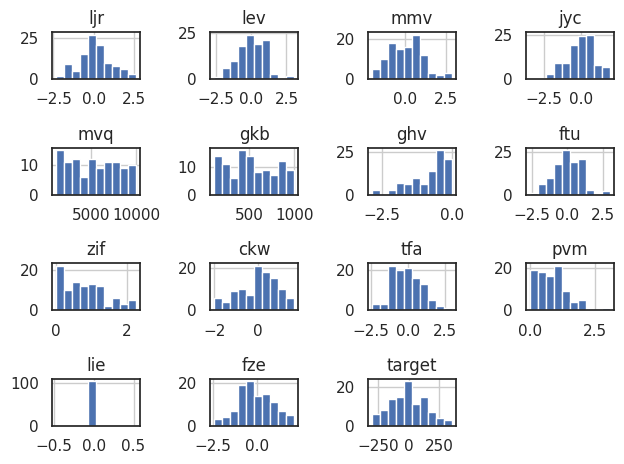

In [ ]:
# plot histograms
import matplotlib.pyplot as plt

sdf.hist()
plt.tight_layout();

In [ ]:
# show null values for each variable
sdf.isnull().sum()

ljr           0
lev           2
mmv           0
jyc           0
mvq           0
gkb           0
ghv          10
ftu           0
zif           7
ckw           0
tfa           0
pvm          13
lie           1
fze           0
survival      0
treatment     0
level         0
stage         0
target        0
dtype: int64

In [ ]:
# print info to recall which variables are numeric vs categorical
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ljr        106 non-null    float64
 1   lev        104 non-null    float64
 2   mmv        106 non-null    float64
 3   jyc        106 non-null    float64
 4   mvq        106 non-null    int64  
 5   gkb        106 non-null    int64  
 6   ghv        96 non-null     float64
 7   ftu        106 non-null    float64
 8   zif        99 non-null     float64
 9   ckw        106 non-null    float64
 10  tfa        106 non-null    float64
 11  pvm        93 non-null     float64
 12  lie        105 non-null    float64
 13  fze        106 non-null    float64
 14  survival   106 non-null    object 
 15  treatment  106 non-null    object 
 16  level      106 non-null    object 
 17  stage      106 non-null    object 
 18  target     106 non-null    float64
dtypes: float64(13), int64(2), object(4)
memory usage: 

In [ ]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()
numeric_columns = sdf.select_dtypes(include=['number']).columns
categorical_columns = sdf.select_dtypes(include=['object']).columns

for column in numeric_columns:
    if sdf[column].skew() > 1.0:
        median = sdf[column].median()
        sdf[column].fillna(median, inplace=True)
    else:
        mean = sdf[column].mean()
        sdf[column].fillna(mean, inplace=True)

for column in categorical_columns:
    mode = sdf[column].mode()[0]
    sdf[column].fillna(mode, inplace=True)
null_counts = sdf.isnull().sum()
print(null_counts)

ljr          0
lev          0
mmv          0
jyc          0
mvq          0
gkb          0
ghv          0
ftu          0
zif          0
ckw          0
tfa          0
pvm          0
lie          0
fze          0
survival     0
treatment    0
level        0
stage        0
target       0
dtype: int64


#### Summary of Missing Data
I utilized the matplotlib.pyplot library to create histograms for every column, allowing me to visualize the distribution of numerical features.while looking into the table i have noticed [ghv,lev,pvm,,zif,lie ] depicted actual data rather then null.I used info() function to ditinguish between numerical and categorical variables .for skewness, i have used mean, median and mode for imputing missin data and confirm with isnull().sum() condition and finally all the values are null as shown to proceed further.

### Train Test Split

Whatever we do with X_train we have to do with X_test but with some considerations:

* if we scale a feature, we fit_transform (train) on X_train and then only transform on X_test
* For things like Variance Inflation Factor, we find the VIF scores for X_train only, but after we decide which features to drop we have to drop from both X_train and X_test

In [ ]:
# train test split (target is the dependent (y) variable), print the shapes for X_train and X_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop("target",axis=1),
                                                 df["target"],
                                                 test_size = 0.25,
                                                 random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 19)
(25, 19)
(75,)
(25,)


**Important:** We will not be using df (the dataframe we created above) for the remaining code. Instead we will be using X_train for df and X_test when appropriate.

### Exploratory Data Analysis

In [ ]:
# describe X_train
x_train.describe()

,jyc,qxv,ftu,mvq,coa,gkb,mmv,ckw,fze,tfa,ljr
count,75.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,-0.114777,7.000000e-02,0.136872,5424.653333,0.097356,529.600000,0.076759,0.097356,0.092817,-0.019695,0.141570
std,0.963531,1.397124e-17,1.045320,2765.724090,1.112278,274.395995,1.065365,1.112278,1.017466,0.903899,0.982001
min,-2.409172,7.000000e-02,-2.266981,1200.000000,-2.336000,116.000000,-2.311890,-2.336000,-2.614194,-1.749420,-1.973611
25%,-0.808104,7.000000e-02,-0.662495,2881.000000,-0.716200,258.500000,-0.590417,-0.716200,-0.590270,-0.631166,-0.638986
50%,-0.039525,7.000000e-02,0.054403,5386.000000,0.090700,518.000000,0.033810,0.090700,0.089119,0.024461,0.134544
75%,0.500435,7.000000e-02,0.812410,7668.500000,0.912900,769.500000,0.687239,0.912900,0.595627,0.662926,0.930619
max,1.662476,7.000000e-02,3.179973,9976.000000,2.882800,997.000000,2.246214,2.882800,3.000939,2.150587,2.357669


Using X_train.describe(), identify the two features with max values greater than 100. These features have scales that are quite different than the other features and must be scaled so that they share the same scale as the other features. Standardize one feature and Normalize the other feature.

In [ ]:
# standardize feature
sdf['mvq'] = (sdf['mvq'] - sdf['mvq'].mean()) / sdf['mvq'].std()
print("Max of mvq after standardizing: ",sdf['mvq'].max())
sdf['gkb'] = (sdf['gkb'] - sdf['gkb'].mean()) / sdf['gkb'].std()
print("Max of gkb after standardizing: ",sdf['gkb'].max())

Max of mvq after standardizing:  1.763341830265526
Max of gkb after standardizing:  1.7946831370509448


In [ ]:
# normalize feature
numeric_columns = x_train.select_dtypes(include=['number'])

x_train = (numeric_columns - numeric_columns.min()) / (numeric_columns.max() - numeric_columns.min())

x_train

,jyc,qxv,ftu,mvq,coa,gkb,mmv,ckw,fze,tfa,ljr
15,0.609736,NaN,0.246982,0.136737,0.448532,0.107832,0.706109,0.448532,0.265587,0.858739,0.352330
41,0.193181,NaN,0.304155,0.772106,0.521652,0.094211,0.573844,0.521652,0.484736,0.190304,0.716592
100,0.868761,NaN,0.760161,0.474704,0.668334,0.299659,0.739434,0.668334,0.607575,0.210961,0.498510
9,0.461936,NaN,0.275977,0.000000,0.699280,0.947787,0.806274,0.699280,0.569556,0.130552,0.489060
74,0.342875,NaN,0.284977,0.081472,0.347724,0.434733,0.667295,0.347724,0.380445,0.023393,0.322125
...,...,...,...,...,...,...,...,...,...,...,...
61,0.431180,NaN,0.323044,0.303099,0.400034,0.740068,0.564770,0.400034,0.385567,0.630069,0.486728
73,0.544027,NaN,0.646157,0.714562,0.789319,0.155505,0.800231,0.789319,0.444245,0.334863,0.523644
14,0.295518,NaN,0.483476,0.808797,0.462616,0.010216,0.553623,0.462616,0.811138,0.374478,0.843808
96,0.547480,NaN,0.278909,0.964221,0.420173,0.804767,0.091020,0.420173,0.562582,0.827650,0.595195


In [ ]:
# describe X_train again to verify transformations
x_train.describe()

,jyc,qxv,ftu,mvq,coa,gkb,mmv,ckw,fze,tfa,ljr
count,75.000000,0.0,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.563505,NaN,0.441321,0.481387,0.466267,0.469467,0.524044,0.466267,0.482092,0.443518,0.488350
std,0.236644,NaN,0.191909,0.315146,0.213129,0.311460,0.233730,0.213129,0.181201,0.231768,0.226723
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.393224,NaN,0.294566,0.191545,0.310378,0.161748,0.377673,0.310378,0.360441,0.286731,0.308136
50%,0.581987,NaN,0.426180,0.476983,0.464992,0.456300,0.514622,0.464992,0.481433,0.454841,0.486728
75%,0.714602,NaN,0.565342,0.737067,0.622538,0.741771,0.657977,0.622538,0.571638,0.618549,0.670525
max,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# X_train.info()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 15 to 52
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jyc     75 non-null     float64
 1   qxv     0 non-null      float64
 2   ftu     75 non-null     float64
 3   mvq     75 non-null     float64
 4   coa     75 non-null     float64
 5   gkb     75 non-null     float64
 6   mmv     75 non-null     float64
 7   ckw     75 non-null     float64
 8   fze     75 non-null     float64
 9   tfa     75 non-null     float64
 10  ljr     75 non-null     float64
dtypes: float64(11)
memory usage: 7.0 KB


In [ ]:
cols = ['qxv']
x_train.drop(cols,axis = 1,inplace = True)

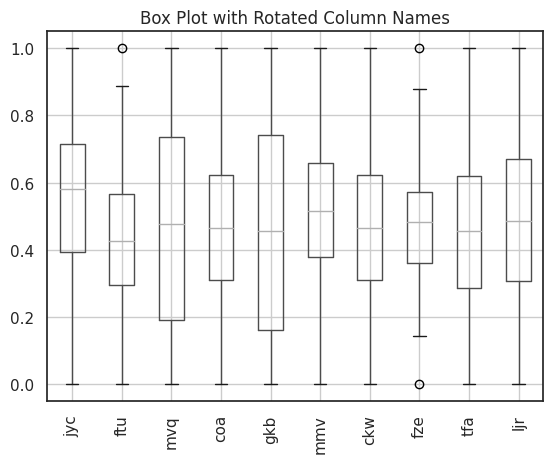

In [ ]:
# check for outliers
x_train.boxplot()
plt.xticks(rotation=90)  # Rotate the column names by 90 degrees
plt.title('Box Plot with Rotated Column Names')
plt.show()

In [ ]:
#vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
1,jyc,1.176419
2,ftu,1.107283
3,mvq,1.091437
4,coa,inf
5,gkb,1.108980
6,mmv,1.101727
7,ckw,inf
8,fze,1.110943
9,tfa,1.135163
10,ljr,1.167385


In [ ]:
vif['VIF']

1     1.176419
2     1.107283
3     1.091437
4          inf
5     1.108980
6     1.101727
7          inf
8     1.110943
9     1.135163
10    1.167385
Name: VIF, dtype: float64

In [ ]:
# delete one of the features out of the pair(s) that show multicollinearity
cols = ['ckw','coa']
x_train.drop(cols,axis = 1,inplace = True)

In [ ]:
# verify you no longer have multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,jyc,1.134127
2,ftu,1.103845
3,mvq,1.091324
4,gkb,1.092797
5,mmv,1.074342
6,fze,1.083556
7,tfa,1.131140
8,ljr,1.165405


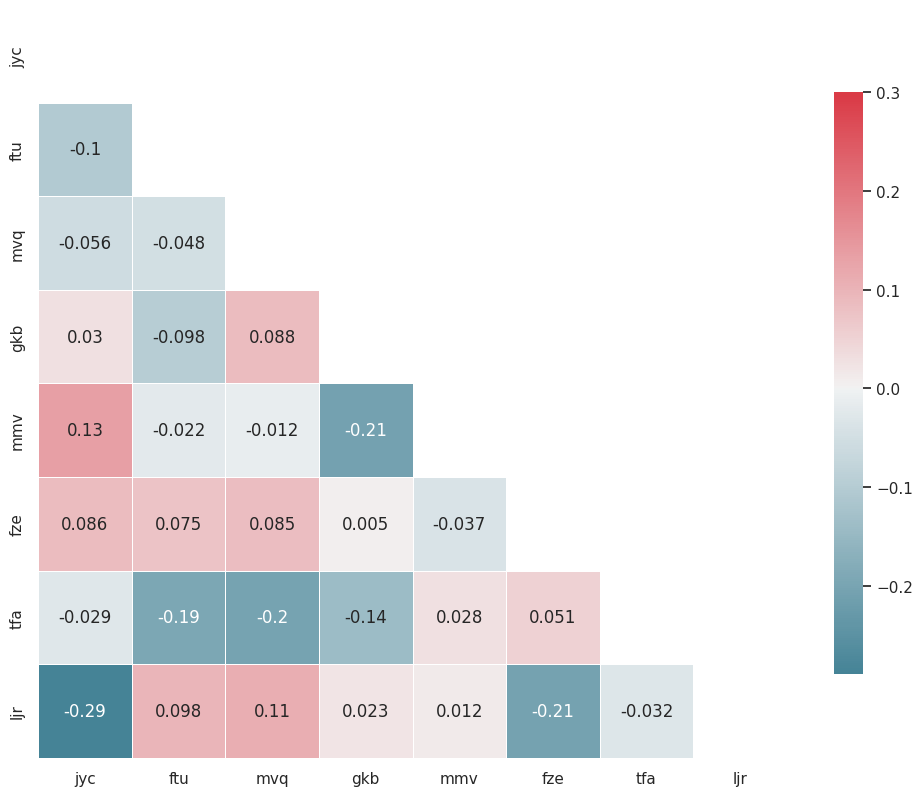

In [ ]:
# show correlation heat map for features, check for multicollinearity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr  = x_train.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(10, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

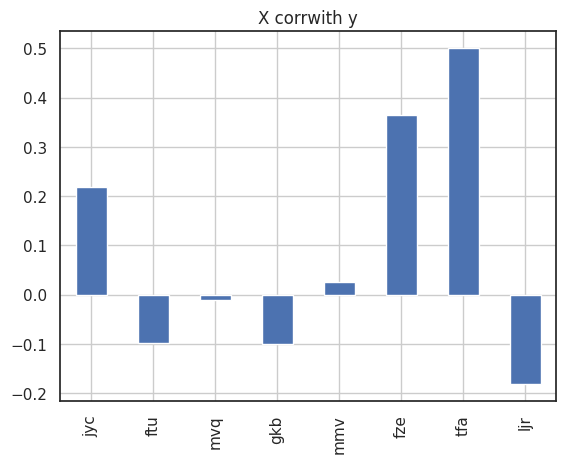

In [ ]:
# correlation with target
x_train.corrwith(y_train).plot.bar(title='X corrwith y', rot=90,grid=True);

#### Summary of EDA
[mvq,gkb] are the 2 max values which are greatee than 100.Recognizing the scale disparity i have standardized and normalized the 2 values to be inline with others.verified the bove using x_train.describe().I found outliers  in the dataset which results in extreme values.After finding the vif, i have deleted the pair which is showing the multicollinearity. Hence I have deleted the pair(jyc,tfa) and checked the multicollinearity again and proceeded with the plot of heatmap and additionally created a bar plot to visualize the correlations between features and the target variable.

In [ ]:
cols = ['ckw','coa']
x_test.drop(cols,axis = 1,inplace = True)
cols = ['qxv']
x_test.drop(cols,axis = 1,inplace = True)

In [ ]:
x_test.shape

(25, 16)

In [ ]:
# create and train a Linear Regression model from the sklearn.linear_model library (be sure to only use numeric data - _get_numeric_data() for X_train and X_test)
# make predictions and provide MSE and RSquared scores
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = x_train._get_numeric_data()
y = y_train._get_numeric_data()
x_tes = x_test._get_numeric_data()
model = LinearRegression()
model.fit(x,y)

yhat = model.predict(x_tes)
print("MSE:",mean_squared_error(y_test,yhat))
print("RSQUARE:",r2_score(y_test,yhat))

MSE: 48013465099.81944
RSQUARE: -2283365.000084632


In [ ]:
# create an OLS model from statsmodels and print the summary
import statsmodels.api as sm
# x_train.insert(0, 'const',1)
model = sm.OLS(y ,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.242
Method:                 Least Squares   F-statistic:                              3.993
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    0.000643
Time:                        21:11:40   Log-Likelihood:                         -464.77
No. Observations:                  75   AIC:                                      945.5
Df Residuals:                      67   BIC:                                      964.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
jyc           25.3778     59.182      0.429      0.669     -92.750     143.505
ftu         -114.1644     72.100     -1.583      0.118    -258.077      29.748
mvq            0.0113     46.971      0.000      1.000     -93.744      93.766
gkb          -76.5720     46.183     -1.658      0.102    -168.754      15.610
mmv          -80.0433     61.120     -1.310      0.195    -202.039      41.953
fze          138.0592     78.415      1.761      0.083     -18.458     294.576
tfa          210.8345     60.240      3.500      0.001      90.594     331.075
ljr         -132.1929     63.117     -2.094      0.040    -258.174      -6.211
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.182
Skew:                           0.111   Prob(JB):                        0.913
Kurtosis:                       2.908   Cond. No.                         8.98
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

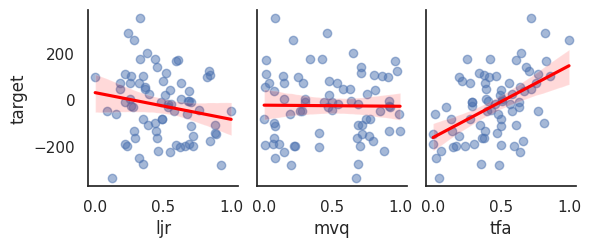

In [ ]:
# create a seaborn pairplot showing the scatter plots of three features with the lowest p-values from the summary above
# include line of best fit and the translucent confidence intervals
import pandas as pd
import seaborn as sns
sns.pairplot(data=pd.concat([x_train, y_train],axis=1),
                               x_vars=['ljr','mvq','tfa'],y_vars = 'target',
                               kind = 'reg',
                               aspect=0.8,
                               plot_kws ={'line_kws':{'color':'red'},
                                          'scatter_kws':{'alpha':0.5}}
                            );

### Using Linear Algebra to get Weights

Take these three features and get the weights of these features by using np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)) as found in the The DataFrame as a Matrix section of the Module 6 Activity notebook. Then using an f string extract the weights from these variables and print a line equation that resembles the example found in the Linear Algebra section of the Module 6 Activity notebook that reads $h_\theta(x) = \theta_0 + \theta_1x_1 ... \theta_nx_n$

In [ ]:
# code here
weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(f"h_theta(x) = {weights[0]:.2f} + {weights[1]:.2f}x1 + {weights[2]:.2f}x2 ")

h_theta(x) = 25.38 + -114.16x1 + 0.01x2 


### Summary

Share some thoughts on what you have discovered during this analysis

In the course of my analysis, I Have assessed  these features  in relation to the target variable using regression coefficients on a standardized scale. These coefficients provided insights into both the direction and strength of these connections, helping in pinpoint which factors are influential in  outcomes. Additionally, I have faced issues related to multicollinearity, where certain values displayed strong correlations. To resolve this, I removed two pairs of highly correlated features or values, and this process of removing allowed me to carry out my analysis accurately . Lastly, I identified the three features with the lowest p-values from the results of the Ordinary Least Squares (OLS) regression.